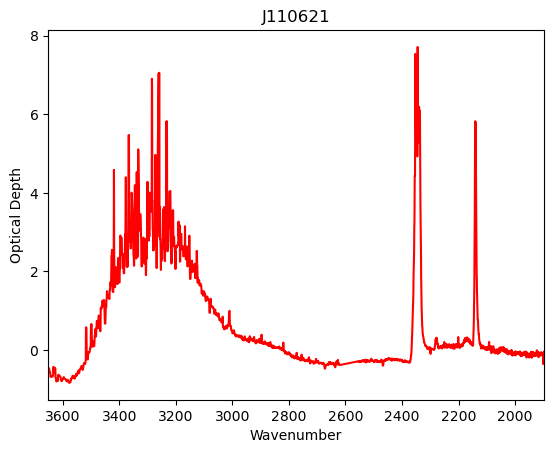

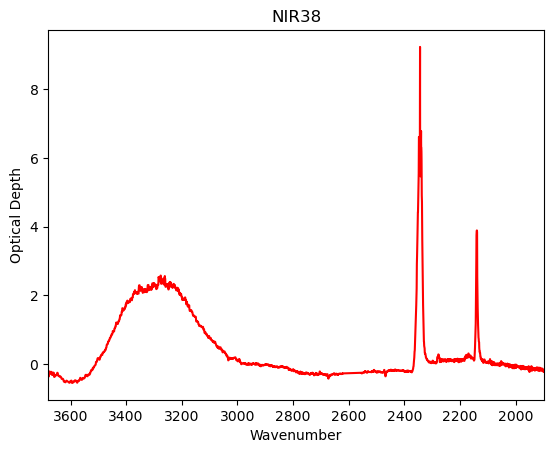

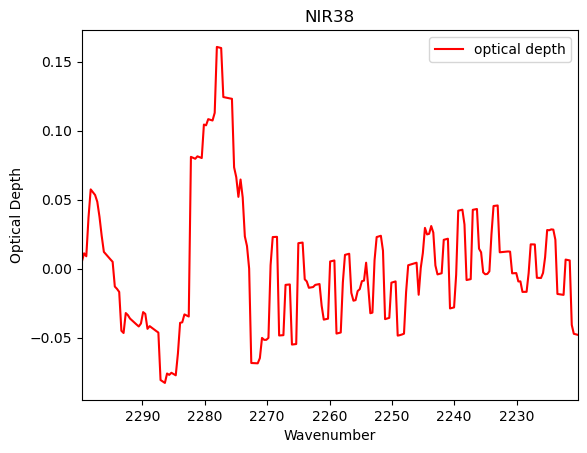

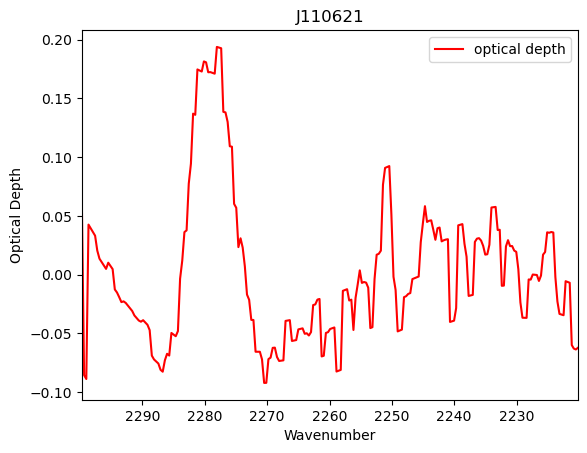

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
from lmfit.models import GaussianModel, LinearModel
import matplotlib.pyplot as plt
from matplotlib import pylab,mlab
from astropy import units as u
from astropy.io import ascii
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

from pylab import *
from numpy import *

Tbl = ascii.read('/home/anastasia/Downloads/J110621_JWST_NIRSpec_FS_spectrum_McClure23.txt',delimiter=' ')

Tbl1 = ascii.read('/home/anastasia/Downloads/NIR38_JWST_NIRSpec_FS_spectrum_McClure23.txt',delimiter=' ')

#Tbl['col1']=1/(Tbl['col1']*u.micron).to(u.cm)
Tbl['col1']=10000/Tbl['col1']
Tbl1['col1']=10000/Tbl1['col1']#convert to wavenumber
Out_Tbl=Tbl['col1','col2']
np.savetxt('/home/anastasia/Documents/AUTUMN2023/SPEC_J11.txt',Out_Tbl,delimiter='	',fmt='%s')
plt.plot(Tbl['col1'], Tbl['col2'])
plt.title('J110621')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(max(Tbl['col1']),min(Tbl['col1']))
#plt.ylim(max(Tbl['col2']),min(Tbl['col2']))
#plt.show()
plt.close()

Out_Tbl1=Tbl1['col1','col2']
np.savetxt('/home/anastasia/Documents/AUTUMN2023/SPEC_NIR38.txt',Out_Tbl1,delimiter='	',fmt='%s')
plt.plot(Tbl1['col1'], Tbl1['col2'])
plt.title('NIR38')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(max(Tbl1['col1']),min(Tbl1['col1']))
#plt.ylim(max(Tbl['col2']),min(Tbl['col2']))
#plt.show()
plt.close()

#-------------------------------------------------------------------------------------------------
data = np.loadtxt('/home/anastasia/Documents/AUTUMN2023/SPEC_J11.txt')
column_to_extract = data[:, 0]
i = 2220
k = 2300
#i = 2060
#k = 2120
indices = np.where((data[:, 0] > i) & (data[:, 0] < k))[0]
extracted_data = data[indices]
np.savetxt('/home/anastasia/Documents/AUTUMN2023/spec_cut_J11.txt', extracted_data, delimiter='\t')

data1 = np.loadtxt('/home/anastasia/Documents/AUTUMN2023/SPEC_NIR38.txt')
column_to_extract = data1[:, 0]
i = 2220
k = 2300
#i = 2060
#k = 2120
indices = np.where((data1[:, 0] > i) & (data1[:, 0] < k))[0]
extracted_data = data1[indices]
np.savetxt('/home/anastasia/Documents/AUTUMN2023/spec_cut_NIR38.txt', extracted_data, delimiter='\t')

#-------------------------------------------------------------------------------------------------
def optd(a1,a2):
    x = np.array(a1)  # Wavelength
    y = np.array(a2)  # Flux
    spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.cm**-1)
    g1_fit = fit_generic_continuum(spectrum)
    y_fit = g1_fit(x*u.cm**-1)
    spec_normalized=spectrum/y_fit

    opt_depth=-np.log(spec_normalized.flux.value)
    return opt_depth,spec_normalized


#Tbl = ascii.read('/home/anastasia/Documents/AUTUMN2023/spec_cut_J11.txt')
Tbl2=ascii.read('/home/anastasia/Documents/AUTUMN2023/SPEC_J11.txt')
opt_depth,sp= optd(Tbl2['col1'],Tbl2['col2'])

#---------------------------------------------------------------------------------------------------
#plt.plot(spec_normalized.spectral_axis, spec_normalized.flux, label='normalized Continuum Fit', c='y')
plt.plot(sp.spectral_axis, opt_depth, label='optical depth', c='r')
plt.xlabel('Wavenumber')
plt.ylabel('Optical Depth')
plt.title('J110621')
#plt.legend()

plt.xlim(max(Tbl2['col1']),min(Tbl2['col1']))
plt.savefig('/home/anastasia/Documents/AUTUMN2023/ACJ11.png',dpi=300)
plt.show()

plt.close()
#---------------------------------------------------------------------------------------------------
Tbl2=ascii.read('/home/anastasia/Documents/AUTUMN2023/SPEC_NIR38.txt')
opt_depth,sp= optd(Tbl2['col1'],Tbl2['col2'])


#plt.plot(spec_normalized.spectral_axis, spec_normalized.flux, label='normalized Continuum Fit', c='y')
plt.plot(sp.spectral_axis, opt_depth, label='optical depth', c='r')
plt.xlabel('Wavenumber')
plt.ylabel('Optical Depth')
plt.title('NIR38')
#plt.legend()
plt.xlim(max(Tbl2['col1']),min(Tbl2['col1']))
plt.savefig('/home/anastasia/Documents/AUTUMN2023/ACIR38.png',dpi=300)
plt.show()

plt.close()
#---------------------------------------------------------------------------------------------------
Tbl = ascii.read('/home/anastasia/Documents/AUTUMN2023/spec_cut_NIR38.txt')
opt_depth,sp= optd(Tbl['col1'],Tbl['col2'])
optspec_ax=sp.spectral_axis
optdepth_nir38=opt_depth
#plt.plot(spec_normalized.spectral_axis, spec_normalized.flux, label='normalized Continuum Fit', c='y')
plt.plot(sp.spectral_axis, opt_depth, label='optical depth', c='r')
plt.xlabel('Wavenumber')
plt.ylabel('Optical Depth')
plt.title('NIR38')
plt.legend()
plt.xlim(max(Tbl['col1']),min(Tbl['col1']))
plt.show()
plt.close()

coord=list(zip(sp.spectral_axis,opt_depth))
for element in coord:
    file=open('/home/anastasia/Documents/AUTUMN2023/optdepth33_SPEC_NIR38.txt',"a")
    file.write(f"{element} \n")
    file.close()





Tbl = ascii.read('/home/anastasia/Documents/AUTUMN2023/spec_cut_J11.txt')
opt_depth,sp= optd(Tbl['col1'],Tbl['col2'])
optspecJ_ax=sp.spectral_axis
optdepth_J11=opt_depth

#plt.plot(spec_normalized.spectral_axis, spec_normalized.flux, label='normalized Continuum Fit', c='y')
plt.plot(sp.spectral_axis, opt_depth, label='optical depth', c='r')
plt.xlabel('Wavenumber')
plt.ylabel('Optical Depth')
plt.title('J110621')
plt.legend()
plt.xlim(max(Tbl['col1']),min(Tbl['col1']))
plt.show()
plt.close()

coord=list(zip(sp.spectral_axis,opt_depth))
for element in coord:
    file=open('/home/anastasia/Documents/AUTUMN2023/optdepth33_SPEC_J11.txt',"a")
    file.write(f"{element} \n")
    file.close()

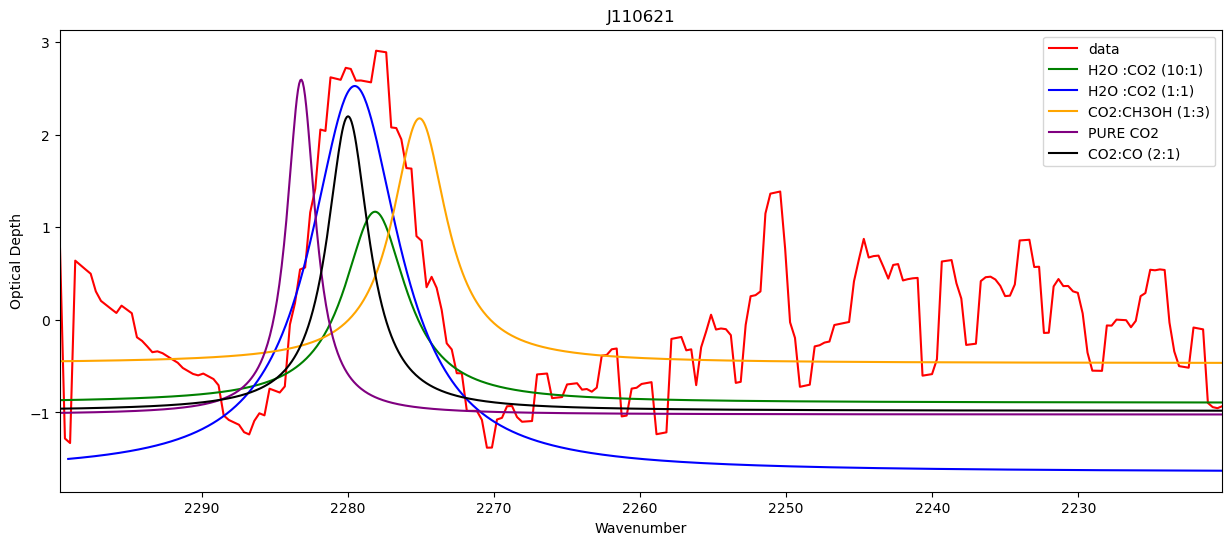

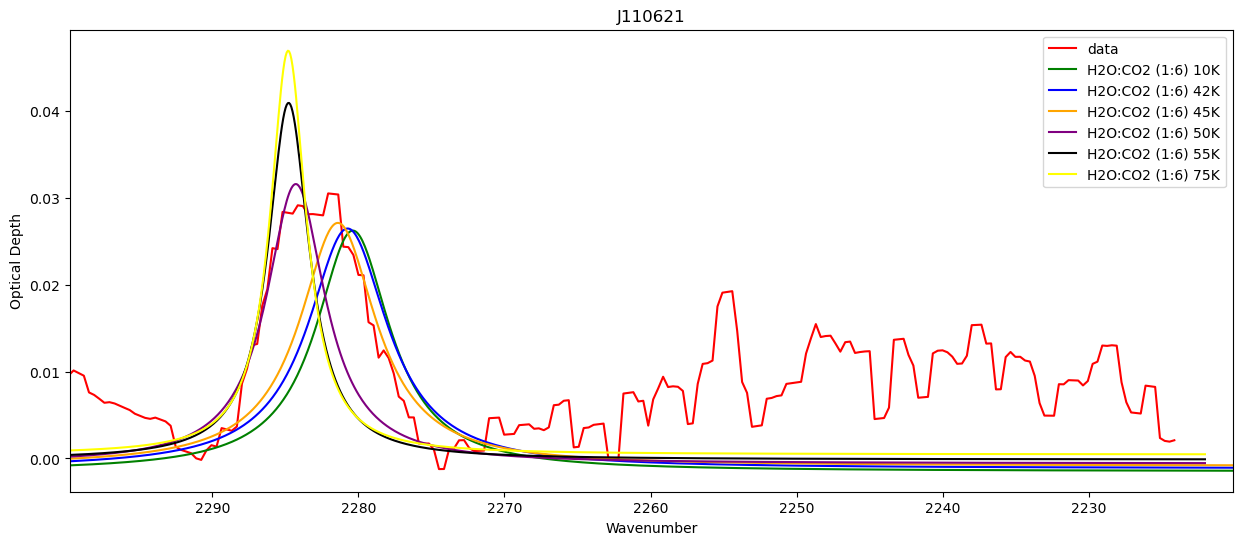

In [41]:
#CO2
from scipy.optimize import curve_fit

def lorentzian(x, amplitude, center, width, baseline):
    return baseline-amplitude/(4*np.pi)*1/((x-center)**2+width**2/4)#baseline - amplitude / ((x - center)**2 + (width/2)**2)

def calculate(x,y,a,b,c,d):
    initial_params = [a,b,c,d]
    popt, pcov = curve_fit(lorentzian, x, y, p0=initial_params)#?,full_output=True)
    amplitude, center, width, baseline = popt
    x_new = np.linspace(np.min(x), np.max(x), num=1000)
    y_fit = lorentzian(x_new, amplitude, center, width, baseline)
    return y_fit,x_new
def extract(path1,path2,i,k,amplitude, center, width, baseline):
    data = np.loadtxt(path1)
    column_to_extract = data[:, 0]
    indices = np.where((data[:, 0] > i) & (data[:, 0] < k))[0]
    extracted_data = data[indices]
    np.savetxt(path2, extracted_data, delimiter='\t')
    Tbl=ascii.read(path2)
    opt=Tbl['col2']*2.3
    opty,optx=calculate(Tbl['col1'],opt,amplitude, center, width, baseline)
    return opty,optx

path1='/home/anastasia/Downloads/157_10.0K/157.txt'#co2:h2o 10:1
path2='/home/anastasia/Documents/AUTUMN2023/astrochemtxt/temp_cut.txt'
i = 2220
k = 2300
opty,optx=extract(path1,path2,i,k,0.08, 2280, 0.005, -0.00005)
path1='/home/anastasia/Downloads/co2_h2o1:1/175.txt'
opty1,optx1=extract(path1,path2,i,k,0.05, 2280, 0.5, -0.01)

path1='/home/anastasia/Downloads/co2_ch3oh1:3/259.txt'
opty2,optx2=extract(path1,path2,i,k,0.05, 2280, 0.5, -0.003)

path1='/home/anastasia/Downloads/pure_co2/1107.txt'

opty3,optx3=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.01)

path1='/home/anastasia/Downloads/co2_co2:1/807.txt'
opty4,optx4=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.003)

plt.figure(figsize=(15, 6))
plt.plot(sp.spectral_axis,opt_depth*15, color='red',label='data')
plt.plot(optx, opty*120-3, color='green',label='H2O :CO2 (10:1)')
plt.plot(optx1, opty1*50,color='blue', label='H2O :CO2 (1:1)')
plt.plot(optx2,opty2*(90)+3,color='orange', label='CO2:CH3OH (1:3)')
plt.plot(optx3, opty3*25-1,color='purple', label='PURE CO2')
plt.plot(optx4,opty4*100,color='black', label='CO2:CO (2:1)')

plt.xlabel('Wavenumber')
plt.ylabel('Optical Depth')
plt.title('J110621')
plt.legend()
plt.xlim(max(Tbl['col1']),min(Tbl['col1']))

plt.savefig('CO2j11_10K.png',dpi=300)
plt.show()
plt.close()
#----------------------------------------
path1='/home/anastasia/Downloads/1126_10.0K.txt/1126.txt'
opty,optx=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.003)

path1='/home/anastasia/Downloads/1127_42.0K.txt/1127.txt'
opty1,optx1=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.003)

path1='/home/anastasia/Downloads/1128_45.0K.txt/1128.txt'
opty2,optx2=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.003)

path1='/home/anastasia/Downloads/1129_50.0K.txt/1129.txt'
opty3,optx3=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.003)

path1='/home/anastasia/Downloads/1130_55.0K.txt/1130.txt'
opty4,optx4=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.003)

path1='/home/anastasia/Downloads/1131_75.0K.txt/1131.txt'
opty5,optx5=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.003)

plt.figure(figsize=(15, 6))
plt.plot(sp.spectral_axis.value+4,opt_depth/9+0.009, color='red',label='data')
plt.plot(optx, opty, color='green',label='H2O:CO2 (1:6) 10K')
plt.plot(optx1, opty1,color='blue', label='H2O:CO2 (1:6) 42K')
plt.plot(optx2,opty2,color='orange', label='H2O:CO2 (1:6) 45K')
plt.plot(optx3+2, opty3,color='purple', label='H2O:CO2 (1:6) 50K')
plt.plot(optx4+2,opty4,color='black', label='H2O:CO2 (1:6) 55K')
plt.plot(optx5+2,opty5,color='yellow', label='H2O:CO2 (1:6) 75K')

plt.xlabel('Wavenumber')
plt.ylabel('Optical Depth')
plt.title('J110621')
plt.legend()
plt.xlim(max(Tbl['col1']),min(Tbl['col1']))

plt.savefig('tempj11_10K.png',dpi=300)
plt.show()
plt.close()







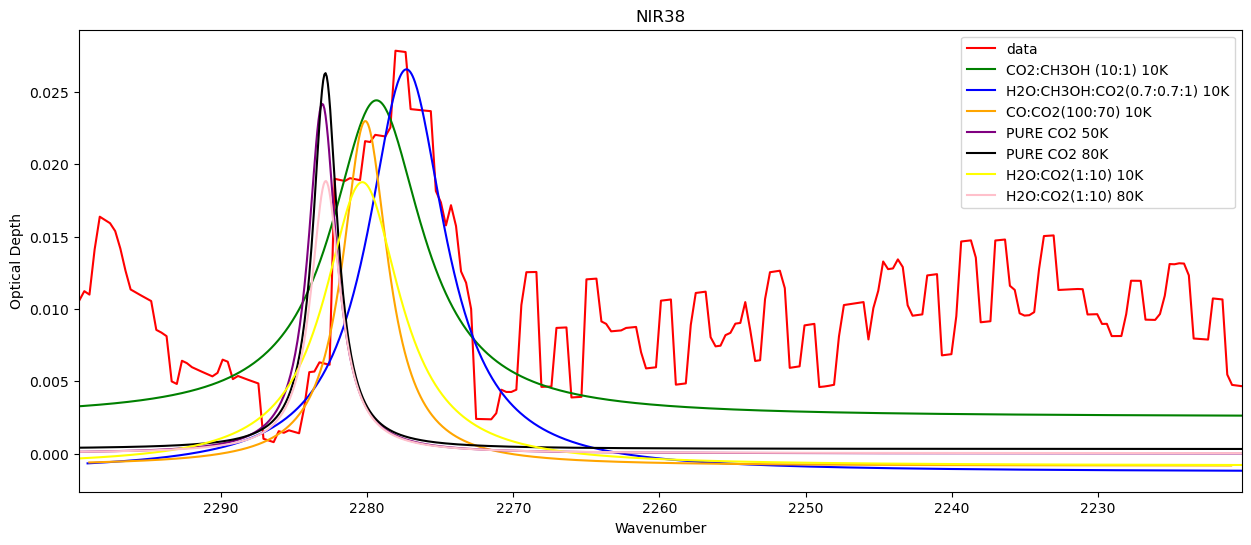

In [42]:
#CO2
#pathopt='/home/anastasia/Documents/AUTUMN2023/optdepth33_SPEC_NIR38.dat'
#Tabl=np.loadtxt(pathopt)
from scipy.optimize import curve_fit

def lorentzian(x, amplitude, center, width, baseline):
    return baseline-amplitude/(4*np.pi)*1/((x-center)**2+width**2/4)#baseline - amplitude / ((x - center)**2 + (width/2)**2)

def calculate(x,y,a,b,c,d):
    initial_params = [a,b,c,d]
    popt, pcov = curve_fit(lorentzian, x, y, p0=initial_params)#?,full_output=True)
    amplitude, center, width, baseline = popt
    x_new = np.linspace(np.min(x), np.max(x), num=1000)
    y_fit = lorentzian(x_new, amplitude, center, width, baseline)
    return y_fit,x_new
def extract(path1,path2,i,k,amplitude, center, width, baseline):
    data = np.loadtxt(path1)
    column_to_extract = data[:, 0]
    indices = np.where((data[:, 0] > i) & (data[:, 0] < k))[0]
    extracted_data = data[indices]
    np.savetxt(path2, extracted_data, delimiter='\t')
    Tbl=ascii.read(path2)
    opt=Tbl['col2']*2.3
    opty,optx=calculate(Tbl['col1'],opt,amplitude, center, width, baseline)
    return opty,optx

path1='/home/anastasia/Downloads/205_10.0K.txt/205.txt'#co2:h2o 10:1
path2='/home/anastasia/Documents/AUTUMN2023/astrochemtxt/temp_cut.txt'
i = 2220
k = 2300
opty,optx=extract(path1,path2,i,k,0.08, 2280, 0.005, -0.00005)
path1='/home/anastasia/Downloads/330_10.0K.txt/330.txt'
opty1,optx1=extract(path1,path2,i,k,0.05, 2280, 0.5, -0.01)

path1='/home/anastasia/Downloads/1081_10.0K.txt/1081.txt'
opty2,optx2=extract(path1,path2,i,k,0.05, 2280, 0.5, -0.003)

path1='/home/anastasia/Downloads/1108_50.0K.txt/1108.txt'

opty3,optx3=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.01)

path1='/home/anastasia/Downloads/1109_80.0K.txt/1109.txt'
opty4,optx4=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.003)

path1='/home/anastasia/Downloads/1132_10.0K.txt/1132.txt'
opty5,optx5=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.003)

path1='/home/anastasia/Downloads/1133_80.0K.txt/1133.txt'
opty6,optx6=extract(path1,path2,i,k,0.5, 2280, 0.5, -0.003)

plt.figure(figsize=(15, 6))
plt.plot(optspec_ax.value,optdepth_nir38/9+0.01, color='red',label='data')
plt.plot(optx, opty/7+0.009, color='green',label='CO2:CH3OH (10:1) 10K')
plt.plot(optx1, opty1/3.5+0.009,color='blue', label='H2O:CH3OH:CO2(0.7:0.7:1) 10K')
plt.plot(optx2,opty2,color='orange', label='CO:CO2(100:70) 10K')
plt.plot(optx3, opty3/6,color='purple', label='PURE CO2 50K')
plt.plot(optx4,opty4/6,color='black', label='PURE CO2 80K')
plt.plot(optx5,opty5/2,color='yellow', label='H2O:CO2(1:10) 10K')
plt.plot(optx6,opty6/4,color='pink', label='H2O:CO2(1:10) 80K')

plt.xlabel('Wavenumber')
plt.ylabel('Optical Depth')
plt.title('NIR38')
plt.legend()
plt.xlim(max(optspec_ax.value),min(optspec_ax.value))

plt.savefig('CO2_10Knir38.png',dpi=300)
plt.show()
plt.close()


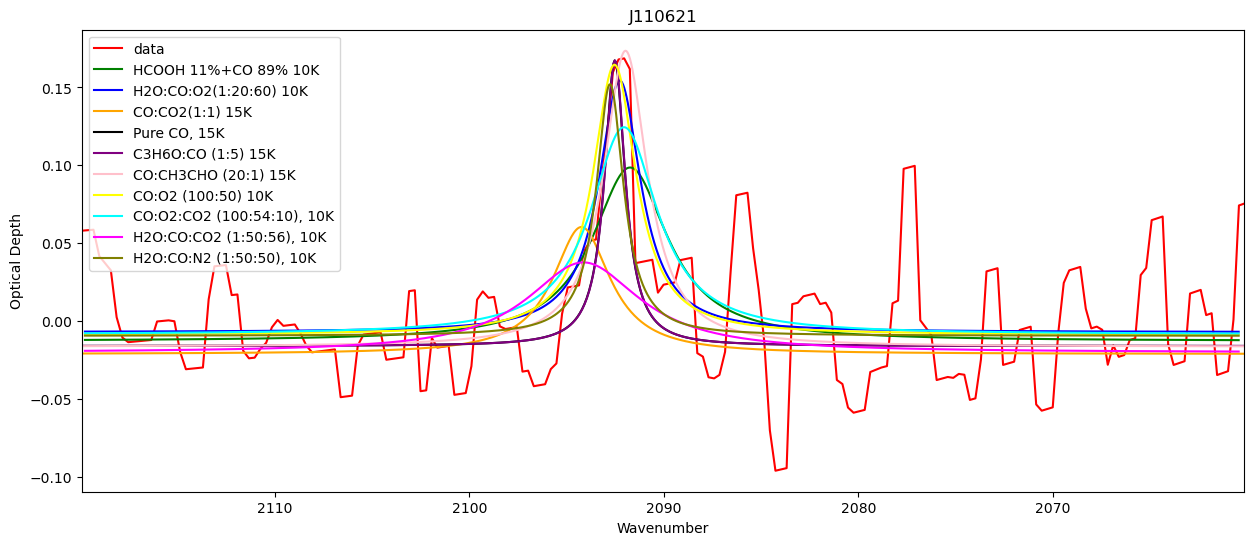

In [38]:
#CO2
#pathopt='/home/anastasia/Documents/AUTUMN2023/optdepth33_SPEC_NIR38.dat'
#Tabl=np.loadtxt(pathopt)
from scipy.optimize import curve_fit

def lorentzian(x, amplitude, center, width, baseline):
    return baseline-amplitude/(4*np.pi)*1/((x-center)**2+width**2/4)#baseline - amplitude / ((x - center)**2 + (width/2)**2)

def calculate(x,y,a,b,c,d):
    initial_params = [a,b,c,d]
    popt, pcov = curve_fit(lorentzian, x, y, p0=initial_params)#?,full_output=True)
    amplitude, center, width, baseline = popt
    x_new = np.linspace(np.min(x), np.max(x), num=1000)
    y_fit = lorentzian(x_new, amplitude, center, width, baseline)
    return y_fit,x_new
def extract(path1,path2,i,k,amplitude, center, width, baseline):
    data = np.loadtxt(path1)
    column_to_extract = data[:, 0]
    indices = np.where((data[:, 0] > i) & (data[:, 0] < k))[0]
    extracted_data = data[indices]
    plt.plot(extracted_data[:,0],extracted_data[:,1])
    #plt.show()
    plt.close()
    np.savetxt(path2, extracted_data, delimiter='\t')
    Tbl=ascii.read(path2)
    opt=Tbl['col2']*2.3
    opty,optx=calculate(Tbl['col1'],opt,amplitude, center, width, baseline)
    plt.plot(optx,opty)
    #plt.show()
    plt.close()
    return opty,optx

path1='/home/anastasia/Downloads/27_15.0K.txt/27.txt'
path2='/home/anastasia/Documents/AUTUMN2023/astrochemtxt/temp_cut.txt'
i = 2060
k = 2120
opty,optx=extract(path1,path2,i,k,0.001, 2092.5, 0.5, -0.02)
path1='/home/anastasia/Downloads/H2O:CO:O2(1:20:60)/1117.txt'
opty1,optx1=extract(path1,path2,i,k,-5, 2092.5, 0.5, 5)

path1='/home/anastasia/Downloads/705_15.0K.txt/705.txt'
opty2,optx2=extract(path1,path2,i,k,-4, 2092.5, 0.5, 5)

path1='/home/anastasia/Downloads/754_15.0K.txt/754.txt'

opty3,optx3=extract(path1,path2,i,k,0.5, 2092.5, 0.5, -0.01)

path1='/home/anastasia/Downloads/971_15.0K.txt/971.txt'

opty4,optx4=extract(path1,path2,i,k,0.5, 2092.5, 0.5, -0.01)

path1='/home/anastasia/Downloads/870_15.0K.txt/870.txt'

opty5,optx5=extract(path1,path2,i,k,0.5, 2092.5, 0.5, -0.01)

path1='/home/anastasia/Downloads/1084_10.0K.txt/1084.txt'

opty6,optx6=extract(path1,path2,i,k,0.5, 2092.5, 0.5, -0.01)

path1='/home/anastasia/Downloads/1101_10.0K.txt/1101.txt'

opty7,optx7=extract(path1,path2,i,k,0.5, 2092.5, 0.5, -0.01)

path1='/home/anastasia/Downloads/1113_10.0K.txt/1113.txt'

opty8,optx8=extract(path1,path2,i,k,0.5, 2092.5, 0.5, -0.01)

path1='/home/anastasia/Downloads/1115_10.0K.txt/1115.txt'

opty9,optx9=extract(path1,path2,i,k,0.5, 2092.5, 0.5, -0.01)









plt.figure(figsize=(15, 6))
plt.plot(optspecJ_ax.value,optdepth_J11, color='red',label='data')
plt.plot(optx, opty*3+0.25, color='green',label='HCOOH 11%+CO 89% 10K')
plt.plot(optx1, opty1*32-0.01,color='blue', label='H2O:CO:O2(1:20:60) 10K')
plt.plot(optx2,opty2*35+0.109,color='orange', label='CO:CO2(1:1) 15K')
plt.plot(optx3, opty3*15,color='black', label='Pure CO, 15K')
plt.plot(optx4, opty3*15,color='purple', label='C3H6O:CO (1:5) 15K')
plt.plot(optx5, opty5,color='pink', label='CO:CH3CHO (20:1) 15K')
plt.plot(optx6, opty6*30,color='yellow', label='CO:O2 (100:50) 10K')
plt.plot(optx7, opty7*35,color='cyan', label='CO:O2:CO2 (100:54:10), 10K')
plt.plot(optx8, opty8*8,color='magenta', label='H2O:CO:CO2 (1:50:56), 10K')
plt.plot(optx9, opty9*12,color='olive', label='H2O:CO:N2 (1:50:50), 10K')


plt.xlabel('Wavenumber')
plt.ylabel('Optical Depth')
plt.title('J110621')
plt.legend()
plt.xlim(max(optspec_ax.value),min(optspec_ax.value))

plt.savefig('13CO_10KJ1106.png',dpi=300)
plt.show()
plt.close()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib
import numpy as np
from lmfit.models import GaussianModel, LinearModel
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import pylab,mlab
from astropy import units as u
from astropy.io import ascii
from astropy.table import unique
from astropy.table import Table
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from sys import argv
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling import models
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

from pylab import *
from numpy import *
#import pyspeckit
#from pyspeckit import *
#print(matplotlib.get_backend())
#matplotlib.use("QtCairo")
#astropyunits

Tbl = ascii.read('/home/anastasia/Downloads/J110621_JWST_MIRI_LRS_FS_spectrum_McClure23.txt',delimiter=' ')
print(Tbl)

#Tbl['col1']=1/(Tbl['col1']*u.micron).to(u.cm)
Tbl['col1']=10000/Tbl['col1'] #convert to wavenumber
Out_Tbl=Tbl['col1','col2']
np.savetxt('/home/anastasia/Documents/AUTUMN2023/astrochem_MIR2.txt',Out_Tbl,delimiter='	',fmt='%s')
plt.plot(Tbl['col1'], Tbl['col2'])
plt.title('')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(max(Tbl['col1']),min(Tbl['col1']))
#plt.ylim(max(Tbl['col2']),min(Tbl['col2']))
plt.show()

#Out_Tbl['col1']=np.where(1200<Tbl['col1'].all()<1400)
#print(Out_Tbl)
#extract wavenumber range however
Tbl = ascii.read('/home/anastasia/Documents/AUTUMN2023/astrochem_MIR.txt')



x = np.array(Tbl['col1'])  # Wavelength
y = np.array(Tbl['col2'])  # Flux
spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.cm**-1)

g1_fit = fit_generic_continuum(spectrum)

y_fit = g1_fit(x*u.cm**-1)

plt.plot(spectrum.spectral_axis, y_fit, label='Continuum Fit', c='g')
plt.plot(spectrum.spectral_axis, spectrum.flux, label='Data for CH4', c='b')
plt.xlabel('Wavenumber,$cm^{-1}$')
plt.ylabel('Intensity,Jy')
plt.legend()
plt.show()
spec_normalized=spectrum/y_fit

opt_depth=-np.log(spec_normalized.flux.value)
#plt.plot(spec_normalized.spectral_axis, spec_normalized.flux, label='normalized Continuum Fit', c='y')
plt.plot(spec_normalized.spectral_axis, opt_depth, label='optical depth', c='r')
plt.xlabel('Wavenumber')
plt.ylabel('Optical Depth')
plt.legend()
plt.show()
coord=list(zip(x,opt_depth))
for element in coord:
    file=open('/home/anastasia/Documents/AUTUMN2023/astrochem_optdepth1.txt',"a")
    file.write(f"{element} \n")
    file.close()

   col1       col2         col3    
--------- ------------ ------------
3.7903018   0.28293998 0.0075102465
3.9428155   0.52146571  0.010322249
4.0826325   0.50942789 0.0093483234
 4.210391   0.43474908 0.0079689695
 4.327218   0.41634614 0.0063221597
 4.434537   0.40051773 0.0039703923
4.5338173   0.39124612 0.0023853035
      ...          ...          ...
13.919824  0.080327219  0.029112094
13.933904 0.0039510918  0.056314042
13.947968  0.085193527  0.034942359
13.962013   0.11645659  0.038423134
13.976046   0.07550587  0.037770969
13.990059  0.040473893  0.031274686
14.004059  0.011519376  0.048318724
Length = 365 rows


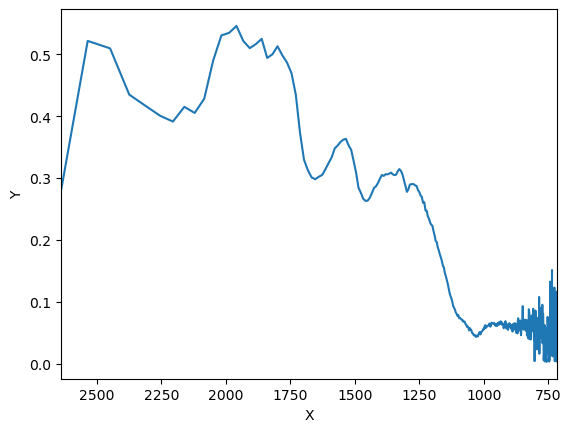

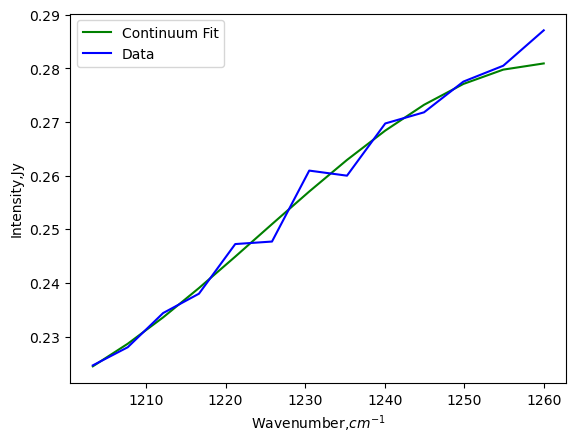

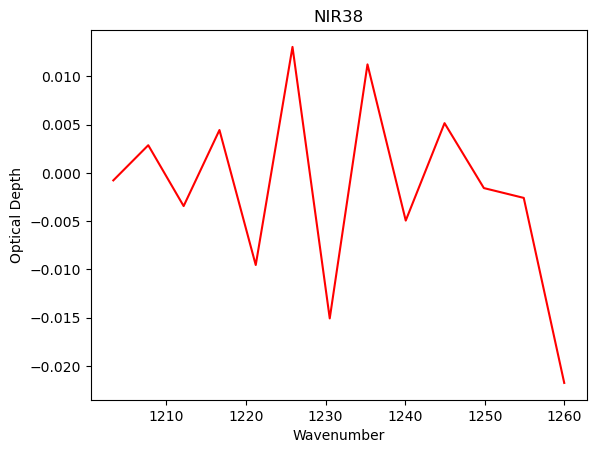

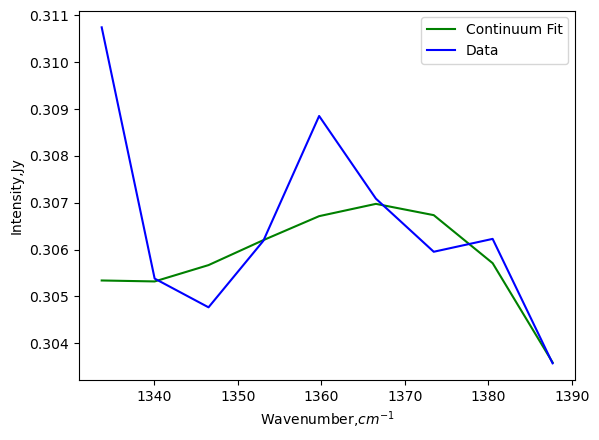

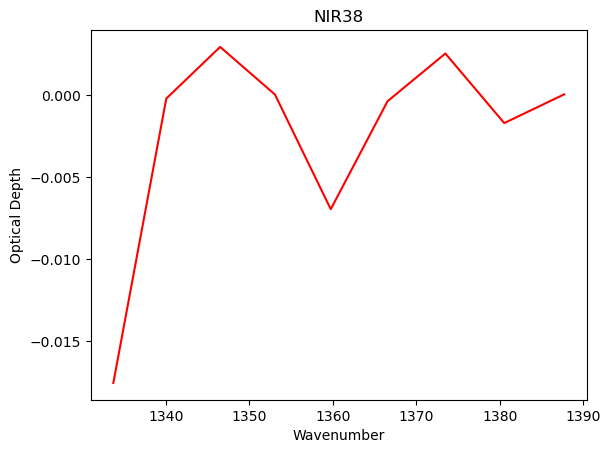

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib
import numpy as np
from lmfit.models import GaussianModel, LinearModel
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import pylab,mlab
from astropy import units as u
from astropy.io import ascii
from astropy.table import unique
from astropy.table import Table
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from sys import argv
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling import models
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

from pylab import *
from numpy import *
#import pyspeckit
#from pyspeckit import *
#print(matplotlib.get_backend())
#matplotlib.use("QtCairo")
#astropyunits

Tbl = ascii.read('/home/anastasia/Downloads/NIR38_JWST_MIRI_LRS_FS_spectrum_McClure23.txt',delimiter=' ')
print(Tbl)

#Tbl['col1']=1/(Tbl['col1']*u.micron).to(u.cm)
Tbl['col1']=10000/Tbl['col1'] #convert to wavenumber
Out_Tbl=Tbl['col1','col2']
np.savetxt('/home/anastasia/Documents/AUTUMN2023/astrochem_MIR1_.txt',Out_Tbl,delimiter='	',fmt='%s')
plt.plot(Tbl['col1'], Tbl['col2'])
plt.title('')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(max(Tbl['col1']),min(Tbl['col1']))
#plt.ylim(max(Tbl['col2']),min(Tbl['col2']))
plt.show()

#Out_Tbl['col1']=np.where(1200<Tbl['col1'].all()<1400)
#print(Out_Tbl)
#extract wavenumber range however
data= np.loadtxt('/home/anastasia/Documents/AUTUMN2023/astrochem_MIR1_.txt')
column_to_extract = data[:, 0]
i = 1200
k = 1260
indices = np.where((data[:, 0] > i) & (data[:, 0] < k))[0]
extracted_data = data[indices]


x = extracted_data[:,0] # Wavelength
y = extracted_data[:,1]# Flux
spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.cm**-1)

g1_fit = fit_generic_continuum(spectrum)

y_fit = g1_fit(x*u.cm**-1)

plt.plot(spectrum.spectral_axis, y_fit, label='Continuum Fit', c='g')
plt.plot(spectrum.spectral_axis, spectrum.flux, label='Data', c='b')
plt.xlabel('Wavenumber,$cm^{-1}$')
plt.ylabel('Intensity,Jy')
plt.legend()
plt.show()
spec_normalized=spectrum/y_fit

opt_depth=-np.log(spec_normalized.flux.value)
#plt.plot(spec_normalized.spectral_axis, spec_normalized.flux, label='normalized Continuum Fit', c='y')
plt.plot(spec_normalized.spectral_axis, opt_depth, label='optical depth', c='r')
#plt.plot(1226,opt_depth)
plt.xlabel('Wavenumber')
plt.ylabel('Optical Depth')
plt.title('NIR38')
#plt.legend()
plt.savefig('/home/anastasia/Documents/AUTUMN2023/ACETONNIR338.png',dpi=300)
plt.show()
coord=list(zip(x,opt_depth))
for element in coord:
    file=open('/home/anastasia/Documents/AUTUMN2023/astrochem_optdepth1__J11.txt',"a")
    file.write(f"{element} \n")
    file.close()

column_to_extract = data[:, 0]
i = 1330
k = 1390
indices = np.where((data[:, 0] > i) & (data[:, 0] < k))[0]
extracted_data = data[indices]


x = extracted_data[:,0] # Wavelength
y = extracted_data[:,1]# Flux
spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.cm**-1)

g1_fit = fit_generic_continuum(spectrum)

y_fit = g1_fit(x*u.cm**-1)

plt.plot(spectrum.spectral_axis, y_fit, label='Continuum Fit', c='g')
plt.plot(spectrum.spectral_axis, spectrum.flux, label='Data', c='b')
plt.xlabel('Wavenumber,$cm^{-1}$')
plt.ylabel('Intensity,Jy')
plt.legend()
plt.show()
spec_normalized=spectrum/y_fit

opt_depth=-np.log(spec_normalized.flux.value)
#plt.plot(spec_normalized.spectral_axis, spec_normalized.flux, label='normalized Continuum Fit', c='y')
plt.plot(spec_normalized.spectral_axis, opt_depth, label='optical depth', c='r')
plt.xlabel('Wavenumber')
plt.ylabel('Optical Depth')
plt.title('NIR38')
plt.savefig('/home/anastasia/Documents/AUTUMN2023/ACETONNIR38.png',dpi=300)
#plt.legend()
plt.show()
coord=list(zip(x,opt_depth))
for element in coord:
    file=open('/home/anastasia/Documents/AUTUMN2023/astrochem_optdepth2__J11.txt',"a")
    file.write(f"{element} \n")
    file.close()